In [156]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numba import jit
import cv2
import time
from IPython.display import clear_output

In [2]:
import sys, os
script_dir = sys.path[0]
print(script_dir)

C:\Users\eliko\Desktop\Data_science_project\Project\data visualization project\cats vs dogs project


In [3]:
#Constant zone
IMG_PATH_TRAIN = os.path.join(script_dir+r'\train')
IMG_PATH_TEST = os.path.join(script_dir+r'\test1')
IMG_PATH_TRAIN_MOD = os.path.join(script_dir+r'\train_modified')
IMG_PATH_TEST_MOD = os.path.join(script_dir+r'\test_modified')
print("Train path:",IMG_PATH_TRAIN+"\n")
print("Test path:",IMG_PATH_TEST+"\n")
print("Modified train path:",IMG_PATH_TRAIN_MOD+"\n")
print("Modified test path:",IMG_PATH_TEST_MOD)

MODIFIED_WIDTH = 150
MODIFIED_HEIGHT = 150

Train path: C:\Users\eliko\Desktop\Data_science_project\Project\data visualization project\cats vs dogs project\train

Test path: C:\Users\eliko\Desktop\Data_science_project\Project\data visualization project\cats vs dogs project\test1

Modified train path: C:\Users\eliko\Desktop\Data_science_project\Project\data visualization project\cats vs dogs project\train_modified

Modified test path: C:\Users\eliko\Desktop\Data_science_project\Project\data visualization project\cats vs dogs project\test_modified


In [4]:
#Function zone

def modify_img(image, new_width, new_height):
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    modified_img = cv2.resize(gray_img, (new_width, new_height))
    return modified_img

def read_img(picture_path, filename):
    return cv2.imread(picture_path+"/"+filename, -1)

def write_img(destination_path, filename, image):
    cv2.imwrite(destination_path+"/"+filename, image)

In [35]:
colored_img = cv2.imread(IMG_PATH_TRAIN+"/"+"cat.0.jpg")
gray_img = cv2.cvtColor(colored_img, cv2.COLOR_BGR2GRAY)
modified_img = cv2.resize(gray_img,(150,150))

In [36]:
cv2.imshow('Original', colored_img)
cv2.imshow('Modified', modified_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
#plt.imshow(Image.open(img_path))

In [8]:
#img = cv2.imread(img_path)
#resize_img = cv2.resize(img,(600,600))

In [9]:
#cv2.imshow('Original', img) 
#cv2.imshow('Resizing', resize_img) 
#cv2.waitKey(0) 
#cv2.destroyAllWindows()

In [10]:
#import matplotlib.image as mpimg

In [11]:
#plt.imshow(cv2.resize(img,(500,500)))

In [5]:
# height = 0
# width = 0
# for f in os.listdir(IMG_PATH_TRAIN):
#     img = read_img(picture_path = IMG_PATH_TRAIN, filename = f)
#     height += img.shape[0]
#     width += img.shape[1]

# print("Mean height:", int(height/25000))
# print("Mean width:", int(width/25000))

Mean height:  360
Mean width:  404


In [46]:
#Modify train data

# start = time.time()
# count = 0
# for f in os.listdir(IMG_PATH_TRAIN):
#     img = read_img(picture_path = IMG_PATH_TRAIN, filename = f)
#     mod_img = modify_img(img, new_width = MODIFIED_WIDTH, new_height = MODIFIED_HEIGHT)
#     write_img(destination_path = IMG_PATH_TRAIN_MOD, filename = f, image = mod_img)
#     msg = "Modified {0}% of training data".format(int(count/250))
#     print(msg)
#     clear_output(wait=True)
#     count += 1

# end = time.time()
# print("Train data modification complete")
# print("Time elapsed in seconds",(end - start))

Train data modification complete
Time elapsed in seconds 119.30374789237976


In [50]:
#Modify test data

# start = time.time()
# count = 0
# for f in os.listdir(IMG_PATH_TEST):
#     img = read_img(picture_path = IMG_PATH_TEST, filename = f)
#     mod_img = modify_img(img, new_width = MODIFIED_WIDTH, new_height = MODIFIED_HEIGHT)
#     write_img(destination_path = IMG_PATH_TEST_MOD, filename = f, image = mod_img)
#     msg = "Modified {0}% of testing data".format(int(count/250))
#     print(msg)
#     clear_output(wait=True)
#     count += 1
    
# end = time.time()
# print("Test data modification complete")
# print("Time elapsed in seconds",(end - start))

Test data modification complete
Time elapsed in seconds 65.92843794822693


In [76]:
# from IPython.display import clear_output
# data = pd.DataFrame()
# row = []
# count = 0
# for f in os.listdir(IMG_PATH_TRAIN_MOD):
#     print("Loading...", str(int(count/250)) + "%")
#     img = cv2.imread(IMG_PATH_TRAIN_MOD+"/"+f, 0)
#     data = data.append(pd.Series(img.reshape(img.size)), ignore_index=True)
    
#     clear_output(wait=True)
#     count += 1
    
#     if(count >= 1000):
#         break

Loading... 3%


In [5]:

@jit(nogil = True)
def images_to_df_train():
    train_array = np.ndarray(shape = (0,MODIFIED_WIDTH,MODIFIED_HEIGHT), dtype= 'uint8')
    count = 0
    for f in os.listdir(IMG_PATH_TRAIN_MOD):
        msg = "Loaded {0} images. {1}%".format(count, count/250)
        print(msg)
        img = read_img(picture_path = IMG_PATH_TRAIN_MOD, filename = f)
        train_array = np.insert(train_array, count , img.reshape((1,MODIFIED_WIDTH,MODIFIED_HEIGHT)), axis = 0)

        clear_output(wait=True)
        count += 1
    print("Data loading complete")
    train_df = pd.DataFrame(data = train_array.reshape(25000, 150*150))
    print("Train dataframe loading complete")
    return train_df
            
train_df = images_to_df_train()


Data loading complete


In [45]:
@jit(nogil = True)
def images_to_df_test(): #Returns dataframe of the test files
    test_array = np.ndarray(shape = (0,MODIFIED_WIDTH,MODIFIED_HEIGHT), dtype= 'uint8')
    count = 0
    for f in os.listdir(IMG_PATH_TEST_MOD):
        msg = "Loaded {0} images. {1}%".format(count, count/250)
        print(msg)
        img = read_img(picture_path = IMG_PATH_TEST_MOD, filename = f)
        test_array = np.insert(test_array, count , img.reshape((1,MODIFIED_WIDTH,MODIFIED_HEIGHT)), axis = 0)

        clear_output(wait=True)
        count += 1
    print("Data loading complete")
    test_df = pd.DataFrame(data = test_array.reshape(12500, 150*150))
    print("Test dataframe loading complete")
    return test_df
            
test_array = images_to_df_test()

Data loading complete
Test dataframe loading complete


In [13]:
train_array.shape

(25000, 150, 150)

In [16]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,22490,22491,22492,22493,22494,22495,22496,22497,22498,22499
0,167,171,173,175,180,183,184,186,188,189,...,1,2,2,2,2,2,2,2,2,2
1,40,43,46,44,62,39,44,47,42,44,...,53,59,49,71,77,75,70,35,41,35
2,33,17,22,41,46,46,41,46,51,57,...,129,128,138,147,157,165,171,172,165,149
3,222,223,223,222,222,225,228,230,223,224,...,205,204,209,216,222,220,215,211,212,213
4,117,116,120,122,123,79,83,71,108,130,...,96,101,112,121,97,81,91,98,84,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,140,141,142,143,143,145,146,147,147,147,...,167,166,167,168,168,168,168,168,169,169
24996,121,77,66,88,132,64,89,78,111,82,...,94,88,95,71,95,74,93,106,90,70
24997,48,52,40,34,60,59,76,62,43,67,...,111,69,98,110,176,98,76,90,171,159
24998,253,254,250,246,239,231,228,220,209,196,...,110,111,104,117,104,110,120,121,113,120


In [93]:
train_df.isnull().sum().sum()

0

In [47]:
test_array

,0,1,2,3,4,5,6,7,8,9,...,22490,22491,22492,22493,22494,22495,22496,22497,22498,22499
0,63,59,61,52,63,67,67,68,65,65,...,173,109,148,131,138,189,180,192,138,93
1,9,9,11,7,10,12,3,4,22,116,...,82,73,78,71,66,73,78,70,73,76
2,4,3,3,3,3,2,2,2,1,2,...,244,254,250,253,251,249,250,231,255,254
3,179,197,168,198,105,200,191,227,204,153,...,160,128,128,156,187,176,186,167,137,138
4,122,152,169,181,164,191,210,238,215,226,...,149,160,159,153,132,147,122,126,128,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,37,39,42,45,47,49,52,55,57,57,...,137,138,118,123,128,131,125,123,115,123
12496,161,144,48,27,99,146,176,148,214,124,...,46,20,25,22,15,7,19,39,21,27
12497,211,212,197,213,226,215,198,199,221,201,...,169,161,147,132,118,140,132,119,125,121
12498,108,114,109,120,123,134,139,144,147,154,...,132,128,125,124,119,120,123,125,123,121


In [92]:
test_array.isnull().sum().sum()

0

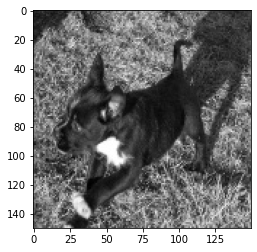

In [76]:
plt.imshow(train_df.iloc[24997].to_numpy().reshape(150,150), cmap = 'gray')

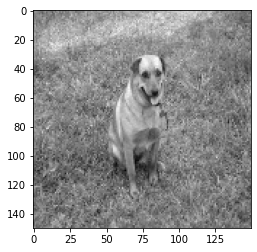

In [57]:
plt.imshow(test_array.iloc[990].to_numpy().reshape(150,150), cmap = 'gray')

## K-MEANS

In [150]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import davies_bouldin_score, silhouette_score, silhouette_samples

In [125]:
TRAIN_VALUES = train_df.values
TEST_VALUES = test_array.values

In [159]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42).fit(TRAIN_VALUES)

In [140]:
kmeans.labels_

array([1, 0, 0, ..., 0, 1, 1])

In [147]:
davies_bouldin_score(TRAIN_VALUES, kmeans.labels_)

2.586884262255618

In [142]:
kmeans.inertia_

2015002512005.5488

In [145]:
silhouette_score(TRAIN_VALUES, kmeans.labels_)

0.11115547131711155

In [148]:
silhouette_score(TEST_VALUES, kmeans.fit_predict(TEST_VALUES))

0.10913124113440027

In [151]:
silhouette_samples(TEST_VALUES, kmeans.labels_)

array([ 0.0619655 ,  0.24062107,  0.0872151 , ...,  0.17240022,
       -0.00132423,  0.03724281])

## MiniBatchK-Means

In [152]:
from sklearn.cluster import MiniBatchKMeans

In [157]:
MBKmeans = MiniBatchKMeans(n_clusters=2, init='k-means++', random_state=42).fit(TRAIN_VALUES)

AttributeError: 'NoneType' object has no attribute 'split'